# REAL RACING 3 VEHICLES - DATA ANALYSIS

# PART 1 (Revision 5)

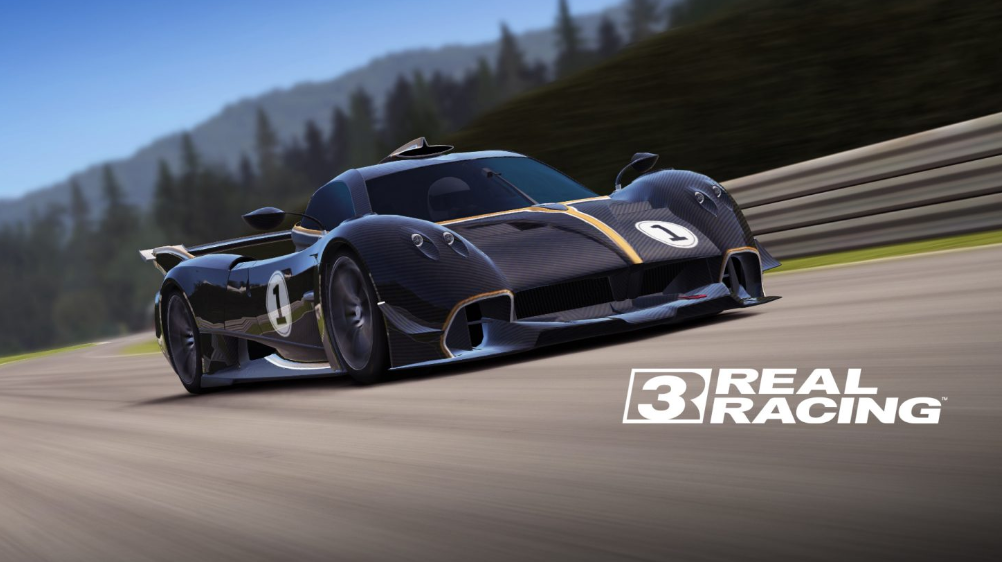

## **Welcome to my 1st part of data analysis for Real Racing 3 Vehicles!**

**This is the 5th revision of the 1st analysis part, which includes all vehicles made available up to game version 12.6.**

_As always, let's begin with importing the necessary modules first:_

In [122]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

And, of course, we have to read the dataframe that contains the data of all vehicles...

**There's something that needs to be preprocessed:** When viewed from GitHub repo, it seems that some tables have unusual resizing and/or print weird characters when the dollar sign `$` appeared in the any column of the dataset during rendering. To avoid this issue, all values in `Price` column that contain `$` should be changed to `dollar` before we begin.

In [123]:
rr3_df = pd.read_csv('real_racing_3_vehicles_v12_6.csv')

In [124]:
for i in range(len(rr3_df)):
    if type(rr3_df.loc[i, 'Price']) != float and rr3_df.loc[i, 'Price'][-1] == '$':
        s = rr3_df.loc[i, 'Price'][:-1] + 'dollar'
        rr3_df.loc[i, 'Price'] = s

## Initial Check

All right! After this preprocessing step, let's see what we have in the **first 8 rows**:

In [125]:
rr3_df.head(8)

,Manufacturer,Model,PR,Top Speed,Acceleration,Braking,Grip,Class,Type,Series,Price,Service Time,Service Cost,Is Available,Has Exclusive Events,In Main Career,In Season 1,In Season 2,In Season 3
0,Acura,NSX (2017),46.7,306,3.10,31.7,1.09,S,M4,2,450 Gold,180,1665,Yes,No,No,Yes,Yes,No
1,Acura,NSX Type S,48.9,307,2.90,32.0,1.10,S,M4,1,600 Gold,180,1812,Yes,No,No,No,No,Yes
2,Acura,NSX GT3,65.2,274,3.02,29.6,1.65,R,MR,2,750 Gold,180,1990,Yes,No,No,No,No,No
3,Acura,ARX-05,78.5,322,2.80,25.6,1.76,R,MR,1,850 Gold,180,1997,Yes,No,No,No,No,No
4,Acura,ARX-06,84.5,335,2.60,23.2,1.78,R,MR,2,2650000 Mdollar,180,0,Yes,No,No,No,No,Yes
5,Alfa Romeo,Giulietta TCR,34.5,241,5.30,29.3,1.30,R,FF,1,180 Gold,180,1332,Yes,No,No,No,No,No
6,Alfa Romeo,4C,29.4,257,4.34,30.2,1.05,P,MR,1,200 Gold,180,1415,Yes,No,No,Yes,Yes,No
7,Alfa Romeo,155 V6 TI,38.0,274,4.60,29.0,1.35,R,F4,2,300 Gold,180,1665,Yes,Yes,No,Yes,No,No


And, in the **last 8 rows**:

In [126]:
rr3_df.tail(8)

,Manufacturer,Model,PR,Top Speed,Acceleration,Braking,Grip,Class,Type,Series,Price,Service Time,Service Cost,Is Available,Has Exclusive Events,In Main Career,In Season 1,In Season 2,In Season 3
507,Toyota,Camry (23XI Racing - 2021),45.4,301,3.42,29.3,1.10,R,FR,1,2150000 Mdollar,180,0,No,No,No,No,No,No
508,Toyota,Camry TRD (2022),45.3,293,3.44,29.3,1.10,R,FR,1,2150000 Mdollar,180,0,No,No,No,No,Yes,No
509,Toyota,Camry TRD (2023),46.7,296,3.34,29.0,1.12,R,FR,1,2150000 Mdollar,180,0,Yes,No,No,No,No,Yes
510,Toyota,GR Yaris Rally1,43.2,201,2.70,29.7,1.37,R,F4,1,2250000 Mdollar,260,0,Yes,No,No,No,No,Yes
511,Toyota,TS040 Hybrid (2014),89.4,394,2.50,26.2,1.82,R,M4,2,950 Gold,325,2192,Yes,No,Yes,No,No,No
512,Volkswagen,Golf GTI (2021),15.4,249,5.10,33.8,0.97,P,FF,2,300 Gold,180,1377,Yes,No,No,Yes,No,No
513,Volkswagen,XL Sport,23.7,270,5.50,32.0,1.25,R,M4,2,350 Gold,180,1415,Yes,No,No,Yes,No,No
514,Volkswagen,ID.R,107.5,269,2.25,19.8,2.45,R,MR,2,1100 Gold,180,2062,Yes,Yes,No,Yes,No,No


**Great! The dataset is loaded and properly prepared then.**

## Basic Steps

Let's start with some basic ones: For instance, get the manufacturer and the model name of the **140th vehicle** in the data frame (you know, indexes start at 0, so we have to select the index **139**):

In [127]:
rr3_df.loc[139, ['Manufacturer', 'Model']]

Manufacturer          Ferrari
Model           F12Berlinetta
Name: 139, dtype: object

As expected, this returned **two values** as we performed extraction from two columns with the specific row number (index) while observing the output above.

But, when I want it to be visible as **plain text**, then this string construction should be done like below:

In [128]:
print("{} {}".format(rr3_df.loc[139, 'Manufacturer'], rr3_df.loc[139, 'Model']))

Ferrari F12Berlinetta


OK, what are the specs of the vehicle at **270th row**?

In [129]:
rr3_df.loc[269, 'PR':'Grip']

PR              54.7
Top Speed        241
Acceleration    3.01
Braking         27.4
Grip            1.35
Name: 269, dtype: object

Hmmm, according to the base stats above, this one must be coming from a **urban exotic sports car**, but it has unusual low top speed... Maybe, these might fit to one of the available **motorsports car**, who knows...

Anyway, this time, I'd like to see the **price to buy**, **total service time** and **cost** for the vehicle at **300th row**:

In [130]:
rr3_df.loc[299, ['Price', 'Service Time', 'Service Cost']]

Price           600 Gold
Service Time         195
Service Cost        1480
Name: 299, dtype: object

According to these results, it should be **an expensive sports car** that belongs to a well-known manufacturer. Here, you need **600 Gold** to buy the vehicle. The value **195** for **Service Time** means the vehicle needs **195 minutes** for full service and **1480** for **Service Cost** means you've got to spend **1480 R$** to begin servicing the vehicle.

How about the **classes** and **types** for vehicles between **391st and 400th index**?

In [131]:
rr3_df.loc[391:400, ['Class', 'Type']]

,Class,Type
391,R,FR
392,R,MR
393,S,MR
394,S,FR
395,R,FR
396,R,FR
397,R,MR
398,P,F4
399,P,FR
400,P,FR(RHD)


All right, we can inspect the data of all vehicles individually like these above all day! But now, let's get more detailed info about this dataset.

First of all, **these are the available columns in the dataset** I'm working with:

In [132]:
rr3_df.columns

Index(['Manufacturer', 'Model', 'PR', 'Top Speed', 'Acceleration', 'Braking',
       'Grip', 'Class', 'Type', 'Series', 'Price', 'Service Time',
       'Service Cost', 'Is Available', 'Has Exclusive Events',
       'In Main Career', 'In Season 1', 'In Season 2', 'In Season 3'],
      dtype='object')

And that's **current shape** of the dataframe: 

In [133]:
rr3_df.shape

(515, 19)

From these numbers, there are **515 rows**, i.e. 515 vehicles existed in the dataset; plus **19 different features** (columns).

How about the general statistics of the features which hold **numerical values** (those with data type of `int` or `float64`)?

In [134]:
round(rr3_df.describe(), 2)

,PR,Top Speed,Acceleration,Braking,Grip,Series,Service Time,Service Cost
count,515.00,515.00,515.00,515.00,515.00,515.00,515.00,515.00
mean,57.96,305.18,3.39,28.80,1.51,2.12,171.24,1055.68
std,30.30,47.58,1.13,6.28,0.65,1.17,49.05,798.88
min,0.10,180.00,1.74,14.30,0.72,1.00,1.00,0.00
25%,42.20,274.00,2.70,26.65,1.08,1.00,180.00,0.00
50%,54.70,311.00,3.10,29.30,1.30,2.00,180.00,1365.00
75%,75.25,329.00,3.70,31.70,1.65,3.00,180.00,1760.00
max,130.30,502.00,8.50,48.80,4.00,8.00,325.00,2192.00


**Whoa!** That's a lot of information we obtained just from one command! Later, all these numbers were rounded (up to 2 decimals) for easier reading.

Well, these numbers already explain themselves much! However, in case you didn't understand what they meant, allow me to clarify:

* **mean** is the average
* **std** is the standard deviation
* **min** and **max** are the minimum and the maximum values
* **25%**, **50%**, **75%** are the 25th percentile, 50th percentile (median), and 75th percentile values, respectively.

I'm obliged to see that **there are no missing values** in the dataset as the **count** values for all columns holding numerical values match the total number of rows available!

Meanwhile, let me check this in more solid way to make sure the statement above is correct... _(there shouldn't be visible output according to the code snippet below if everything goes alright)_

In [135]:
for col in ['PR', 'Top Speed', 'Acceleration', 'Braking', 'Grip', 'Series', 'Service Time', 'Service Cost']:
    if rr3_df[col].isnull().any() is True:
        print('Missing value exists in {} column.'.format(col))
    else:  print('No missing values were found for column', col)

No missing values were found for column PR
No missing values were found for column Top Speed
No missing values were found for column Acceleration
No missing values were found for column Braking
No missing values were found for column Grip
No missing values were found for column Series
No missing values were found for column Service Time
No missing values were found for column Service Cost


Furthermore, we are used to coming across **seasonal events** in the game for **3 years** (starting at **version 9.6** if I'm correct) which were divided into **several rounds** that continue until the next update was released. Each round features **a prize vehicle** and, the last update (v12.6) featured **Volkswagen XL Sport**.

As an ordinary player, you need to collect enough amount of **Victory Points** through the events within the allowed time interval for that round to get the vehicle in your garage, or **a bag of Gold** if you already got that.

## Get Some Numerical Values

OK, after this discussion, let's continue the analyses...

With `describe()` method, we've seen many **descriptive decimal values**. Can I do the same with `numpy` methods? Let's try them on **PR** column:

In [136]:
PR = rr3_df['PR'].values
print("Count: {}\nMean: {:.6}\nStd. Dev.: {:.6}".format(PR.size, PR.mean(), PR.std()))

Count: 515
Mean: 57.9569
Std. Dev.: 30.2705


In [137]:
print("Min: {}\nMax: {}".format(PR.min(), PR.max()))

Min: 0.1
Max: 130.3


In [138]:
print("25th, 50th, 75th  percent values: {}".format(np.percentile(PR, [25, 50, 75])))

25th, 50th, 75th  percent values: [42.2  54.7  75.25]


Yes, they are all doable and exactly the same values are encountered! There is only **a minor difference** at standard deviation value, though... (just 0.03)

## Analyses on Vehicles

According to the information above, I want to get all the data of vehicles which have **the lowest** PR values, i.e. **0.1**:

In [139]:
lowest_PR = rr3_df[rr3_df['PR'] == 0.1]
lowest_PR.loc[:]

,Manufacturer,Model,PR,Top Speed,Acceleration,Braking,Grip,Class,Type,Series,Price,Service Time,Service Cost,Is Available,Has Exclusive Events,In Main Career,In Season 1,In Season 2,In Season 3
359,Mazda,RX-3,0.1,185,7.7,42.1,0.80,P,FR,2,50 Gold,30,582,Yes,No,No,Yes,No,No
360,Mazda,MX-5 (NA),0.1,195,8.5,43.6,0.86,P,FR,2,60 Gold,40,617,Yes,Yes,No,No,Yes,No
403,Nissan,Skyline 2000 GT-R (KPGC10),0.1,201,7.9,44.2,0.85,P,FR(RHD),1,50 Gold,30,582,Yes,No,No,No,No,Yes
434,Porsche,911 Targa (1974),0.1,209,8.2,39.3,0.89,P,RR,1,53000 Rdollar,35,602,Yes,No,No,No,No,No


**Hey, look at this!** The lowest PR value is shared by **total of 4 vehicles**, not 1! Well, we can imply that **1974 model Porsche 911 Targa** is purchasable with R$, while the others **Mazda RX-3**, **Mazda MX-5 (NA)** and **Nissan Skyline 2000 GT-R** cost Gold to buy, but they are not expensive!

What all these vehicles have in common are that _they are very slow; accelerations are poor; brakings are not strong and they have inadequate cornering grips_. However, with upgrades applied later, we can bring them to the better shape for racing... On a positive side, _their servicing times are under 1 hour, and the servicing costs are cheap._

Conversely, how about the vehicle with **the highest PR** value?

In [140]:
highest_PR = rr3_df[rr3_df['PR'] == 130.3]
highest_PR.loc[:]

,Manufacturer,Model,PR,Top Speed,Acceleration,Braking,Grip,Class,Type,Series,Price,Service Time,Service Cost,Is Available,Has Exclusive Events,In Main Career,In Season 1,In Season 2,In Season 3
383,McLaren,MP4-X,130.3,402,1.9,14.3,4.0,R,MR(MHD),2,1200 Gold,240,2117,Yes,Yes,No,No,Yes,No


That's, **McLaren MP4-X**, a futuristic F1-inspired hypercar! It still holds the highest PR, even through many updates up until now!

This vehicle really deserves to have the highest PR value in the game in terms of its base stats. If we compare the values with the ones inside the table of numerical values, obtained via `describe()`, it **has the highest cornering grip and lowest braking distance!** However, it **doesn't have the highest top speed and acceleration values!**

Well, I wonder which one has **the highest top speed** then...

In [141]:
highest_TS = rr3_df['Top Speed'].max()
highest_TS_name = rr3_df[rr3_df['Top Speed'] == highest_TS]
highest_TS_name

,Manufacturer,Model,PR,Top Speed,Acceleration,Braking,Grip,Class,Type,Series,Price,Service Time,Service Cost,Is Available,Has Exclusive Events,In Main Career,In Season 1,In Season 2,In Season 3
298,Hennessey,Venom F5,84.5,502,2.52,25.9,1.69,S,MR,2,1000 Gold,180,2062,Yes,Yes,No,Yes,Yes,No


Hey! That's **Hennessey Venom F5**, which is available with version **9.x**, has the highest top speed (**502 kph**; in other words, **>310 mph**) even with **no upgrades**! But, the other stat attributes are not enough to put the vehicle **100+ PR**, as revealed above (stayed at **84.5**).

Similarly, the vehicle with **the best acceleration** is...

In [142]:
highest_accl = rr3_df['Acceleration'].min()
highest_accl_name = rr3_df[rr3_df['Acceleration'] == highest_accl]
highest_accl_name

,Manufacturer,Model,PR,Top Speed,Acceleration,Braking,Grip,Class,Type,Series,Price,Service Time,Service Cost,Is Available,Has Exclusive Events,In Main Career,In Season 1,In Season 2,In Season 3
492,Rimac,Nevera,93.2,415,1.74,27.3,1.68,S,M4,2,1100 Gold,180,2090,Yes,Yes,No,No,No,Yes


Oh my goodness! This superior stat belongs to **Rimac Nevera**, which is the fastest **electrical ultra luxury sports vehicle** from Croatia; and, in the real world, it has already broken some speed records among all electrical vehicles! Imagine you're driving this in the game, and when you hit the throttle, you'll never believe how immensely fast it can reach the high speeds! However, this also needs **greater control** while cornering and braking should start at earlier distances in order not to go off-track!

Now, let's see which vehicle appears **the most throughout all career series** (combination of _main_, _bonus_ or _exclusive_ series):

In [143]:
highest_series = rr3_df['Series'].max()
rr3_df[rr3_df['Series'] == highest_series]

,Manufacturer,Model,PR,Top Speed,Acceleration,Braking,Grip,Class,Type,Series,Price,Service Time,Service Cost,Is Available,Has Exclusive Events,In Main Career,In Season 1,In Season 2,In Season 3
455,Porsche,918 Spyder Concept,60.2,322,3.0,30.2,1.4,S,M4,8,845000 Rdollar,215,1605,Yes,No,Yes,No,Yes,No


Ah yes, one of my favourite vehicle here, and it still **holds the highest number (8)** in the game version 12.6: **Porsche 918 Spyder Concept**.

This should be a smart choice for any racer to go for full upgrade, right? _That's because, any fully upgraded vehicle will have 2x longer condition before servicing..._

OK, lastly, through these numbers above (the stats we've seen with `describe()`), I noticed that the **minimum required servicing time is just 1 minute**.

Thus, **which vehicle does almost not need much servicing time?**

In [144]:
minimum_service_time = rr3_df['Service Time'].min()
rr3_df[rr3_df['Service Time'] == minimum_service_time]

,Manufacturer,Model,PR,Top Speed,Acceleration,Braking,Grip,Class,Type,Series,Price,Service Time,Service Cost,Is Available,Has Exclusive Events,In Main Career,In Season 1,In Season 2,In Season 3
400,Nissan,Silvia (S15),1.7,243,5.5,34.4,0.85,P,FR(RHD),3,25700 Rdollar,1,342,Yes,No,Yes,No,No,No


Hey, that's our good ol' friend **Nissan Silvia (S15)**! That was our first vehicle ever to own in the game, right? Plus, if you have ever driven that Japanese, it shouldn't be so expensive to get it to fully upgraded, though!

In contrast, which one has **the highest servicing time**?

In [145]:
max_service_time = rr3_df['Service Time'].max()
rr3_df[rr3_df['Service Time'] == max_service_time]

,Manufacturer,Model,PR,Top Speed,Acceleration,Braking,Grip,Class,Type,Series,Price,Service Time,Service Cost,Is Available,Has Exclusive Events,In Main Career,In Season 1,In Season 2,In Season 3
511,Toyota,TS040 Hybrid (2014),89.4,394,2.5,26.2,1.82,R,M4,2,950 Gold,325,2192,Yes,No,Yes,No,No,No


Uh-huh, it's a **Toyota**! But, not a street legal vehicle; instead, from _Endurance Motorsport Series_ in **Motorsports** section and _Endurance Legends_ in **Legend** section of **Road Collection**. We figure out that it needs **325 minutes** (5 hours 25 minutes) to have it fully serviced. Likewise, compared with the numerical values above, **the highest servicing cost** belongs to this vehicle, too (**2192 R$**)!

Speaking of the servicing time, what could be **the median value** of this?

In [146]:
median_service_time = rr3_df['Service Time'].median()
print("Median of service time --> {:.0f} minutes.".format(median_service_time))
count_median_service_time = rr3_df[rr3_df['Service Time'] == median_service_time].shape[0]
print("{} vehicles have this duration of servicing time.".format(count_median_service_time))

Median of service time --> 180 minutes.
340 vehicles have this duration of servicing time.


OK, it's not surprising that the median value is **180 minutes = 3 hours**, since many new vehicles that were arrived throughout the latest updates, they have their service times set to that value. In the latest game version 12.6, it's been raised to even higher value, **340 vehicles**!

In [147]:
print("Ratio of vehicles having service time of 3 hours --> {:.2f} percent".format(
    count_median_service_time/rr3_df.shape[0] * 100))

Ratio of vehicles having service time of 3 hours --> 66.02 percent


By doing a simple calculation here, we imply that _180-minute servicing time_ accounts for **66.02%** of the vehicles in total! That's a very large share among all the servicing times!

Another thing is, there does exist vehicles **with NO service costs**. Interesting, right? What are these?

In [148]:
no_service_cost = rr3_df[rr3_df['Service Cost'] == 0]
print(no_service_cost.shape[0], "vehicles are free to service!")
no_service_cost.loc[:,['Manufacturer', 'Model', 'Class', 'Service Time', 'Price']]

161 vehicles are free to service!


,Manufacturer,Model,Class,Service Time,Price
4,Acura,ARX-06,R,180,2650000 Mdollar
19,Aston Martin,Vantage GTE (2019),R,180,1950000 Mdollar
22,Aston Martin,V8 Vantage GT2,R,180,1900000 Mdollar
24,Aston Martin,Vantage GT4,R,180,1000000 Mdollar
25,Aston Martin,DBR1-2,R,180,2300000 Mdollar
...,...,...,...,...,...
506,Toyota,Camry (Joe Gibbs Racing - 2021),R,180,2150000 Mdollar
507,Toyota,Camry (23XI Racing - 2021),R,180,2150000 Mdollar
508,Toyota,Camry TRD (2022),R,180,2150000 Mdollar
509,Toyota,Camry TRD (2023),R,180,2150000 Mdollar


Wow! We came across many vehicles! As you know that, these are all from **Motorsports Discipline!** (They all did not fit in the output due to space limits) It is good to know that you don't need to pay anything when you want to service one of these vehicles listed above (also that's because they were all utilized for earning `M$`). Moreover, the number doesn't look like small as there are **more than 150 vehicles** eligible for that!

Now, I would like to see **the manufacturers and their counts** of vehicles with free servicing:

In [149]:
no_service_cost['Manufacturer'].value_counts()

Formula 1       64
Formula E       44
Chevrolet       14
Porsche          8
Ford             6
Toyota           6
Aston Martin     4
BMW              4
Audi             2
Ferrari          2
Mercedes-AMG     2
Acura            1
Bentley          1
McLaren          1
Oreca            1
Radical          1
Name: Manufacturer, dtype: int64

Oh, that's a slightly long list in terms of manufacturers, and we can see more different ones that made it to the list; for instance, **Acura**, **Oreca**, and **Radical**.

This list, by the way, is interesting in the way that **Formula 1** and **Formula E** both tops the count! In reality, there are many different teams participated through various seasons, but the game encapsulated them all within the related disciplines, no matter which season it was.

Let's categorize all these Motorsport disciplines in a broad manner:
* **Formula 1** 2019-2024 Seasons
* **Formula E** Season 6, 7 and 8 (including those from previous seasons 3, 4 and 5) + Season of Gen3
* **NASCAR** 2020-2023 Seasons
* The rest is derived from _GT3_, _GT4_, _WRC,_ _Euro Track Masters_, _Supercars_, _IMSA GTD_, _IMSA DPi_, _Endurance GT_ and _Endurance Prototypes_ classes.

_Those that are utilized with_ `R$` _are not included._

What most of them have in common is that, despite no servicing cost, their servicing time is **180 minutes**! That should be a clear evidence of why the number of 180-minute servicing-time vehicles are so high!

In [150]:
print('Different servicing times for vehicles from Motorsport disciplines, purchaseable with M$: {} minutes'.format(
    set(no_service_cost['Service Time'].values)))

Different servicing times for vehicles from Motorsport disciplines, purchaseable with M$: {180, 260} minutes


Well, from the implication above, there is an additional different servicing time, which is **260 minutes**. Which vehicle could need such a longer servicing?

In [151]:
no_service_cost[no_service_cost['Service Time'] == 260]

,Manufacturer,Model,PR,Top Speed,Acceleration,Braking,Grip,Class,Type,Series,Price,Service Time,Service Cost,Is Available,Has Exclusive Events,In Main Career,In Season 1,In Season 2,In Season 3
510,Toyota,GR Yaris Rally1,43.2,201,2.7,29.7,1.37,R,F4,1,2250000 Mdollar,260,0,Yes,No,No,No,No,Yes


Oh well, that's the recently added **Toyota GR Yaris Rally1**, belonging to **WRC** category, which is the brand-new Motorsports discipline. Although it was built for rallying action, RR3 made it available for driving on asphalt surface in various race tracks. That looks a bit weird, right? I still don't understand why the developers set a different servicing time than the others!

All right, time to move on... Notice that the count of **Chevrolet** is the highest when we think about the individual manufacturers. Let me reveal these vehicles:

In [152]:
no_service_cost[no_service_cost['Manufacturer'] == 'Chevrolet'][['Manufacturer', 'Model', 'Is Available']]

,Manufacturer,Model,Is Available
93,Chevrolet,Corvette Grand Sport,Yes
94,Chevrolet,Camaro Z/28 (Racing),Yes
95,Chevrolet,Corvette C8.R (2020),Yes
108,Chevrolet,Camaro ZL1 1LE (Hendrick Motorsports - 2020),No
109,Chevrolet,Camaro ZL1 1LE (Chip Ganassi Racing - 2020),No
110,Chevrolet,Camaro ZL1 1LE (Richard Childress Racing - 2020),No
111,Chevrolet,Camaro ZL1 1LE (Richard Petty Motorsports - 2020),No
112,Chevrolet,Camaro ZL1 1LE (Hendrick Motorsports - 2021),No
113,Chevrolet,Camaro ZL1 1LE (Chip Ganassi Racing - 2021),No
114,Chevrolet,Camaro ZL1 1LE (Richard Childress Racing - 2021),No


Ah, among all, **10 of them** are from **NASCAR**! However, they are no longer available for purchase in the game, as they all had **limited time** to buy one. You should feel pleased and lucky if you were quick enough to own at least one of them, thus making you eligible to get into oval racing action, similar to real life!

Furthermore, all Motorsports vehicles can be obtained only with the special `Mdollar` currency, **started in game version 8.0** with the arrival of **2019 Season Formula 1 cars**. 

If you are eager to own them all in the current state, then you would need:

In [153]:
def get_mdollars(vals):
    n = []
    for v in vals:
        n.append(int(v[:-8]))
    return n
mdollars = get_mdollars(no_service_cost['Price'].values)
print("You need {} Mdollars to own all motorsport vehicles.".format(sum(mdollars)))

You need 327175000 Mdollars to own all motorsport vehicles.


Well, the restriction is that you can earn up to M$250,000 every day! So, **how many days should you play consecutively** in order to buy all of these vehicles provided that you always earn the maximum amount?

In [154]:
print("You need to play for {:.0f} consecutive days!".format(sum(mdollars) / 250000.0))

You need to play for 1309 consecutive days!


Oh man! That's **more than 3 years**! I don't even count the **other criterions** for incomes and expenses, such as bonus M$ from events, upgrades, tuning setups, driver levels and team principal levels.

On to the next one... In every new update to the game, we know that it generally selects **one**, **two** or even **three** vehicles to be eligible for **Exclusive Events**. However, in order to unlock to these events, you need to **fully upgrade** those vehicles! Yet, as I said before, their durabilities are **doubled** when all the upgrades are completed.

Well, **how many of them have gained the right** to be accessed to its own exclusive events?

In [155]:
print(rr3_df['Has Exclusive Events'].value_counts())
print("\n*** That accounts for {:.2f} percent among all vehicles. ***".format(
     len(rr3_df[rr3_df['Has Exclusive Events'] == 'Yes']) / len(rr3_df) * 100))

No     374
Yes    141
Name: Has Exclusive Events, dtype: int64

*** That accounts for 27.38 percent among all vehicles. ***


With the latest updates, the number has been increased to **141** vehicles. If possible, **may I name several of them randomly?**

In [156]:
rr3_exclusive = rr3_df[rr3_df['Has Exclusive Events'] == 'Yes']
rr3_exclusive.sample(n=20, random_state=21)[['Manufacturer', 'Model', 'Price']]

,Manufacturer,Model,Price
144,Ferrari,F40 LM,800 Gold
383,McLaren,MP4-X,1200 Gold
49,Bentley,Continental GT Speed (2021),750 Gold
466,Porsche,911 Turbo S,725 Gold
320,Koenigsegg,Regera,1000 Gold
57,BMW,M1,200 Gold
21,Aston Martin,V12 Vantage (2022),600 Gold
75,Bugatti,Veyron 16.4,1650000 Rdollar
341,Lamborghini,Sian FKP 37,750 Gold
381,McLaren,MP4/4,950 Gold


This random list indicates that any vehicle with exclusive events might be cheap or expensive. Hence, it's up to you if you'd like to access those prestigious events, then you need a pile of **Gold**, **R\$**, or **M\$** for full upgrade that can exceed the original price value for any vehicle with exclusive event availability.

Now, let me investigate the vehicles in **main career series** that you can race in **Road Collection**. In order to own all for earning good amount of **R$** particularly, then the requirement is written in the code result below:

In [157]:
def get_total_curr_counts(vals):
    r, g = 0, 0
    for v in vals:
        if v[-7:] == 'Rdollar':   r += 1
        elif v[-4:] == 'Gold':    g += 1
    return r, g
def get_total_prices(vals):
    r, g = [], []
    for v in vals:
        if v[-7:] == 'Rdollar':   r.append(int(v[:-8]))
        elif v[-4:] == 'Gold':    g.append(int(v[:-5]))
    return r, g
rr3_main_career = rr3_df[rr3_df['In Main Career'] == 'Yes']
rdollar_cnt, gold_cnt = get_total_curr_counts(rr3_main_career['Price'].values)
print("There are {} vehicles available in main career series. ({} with R$, {} with Gold)".format(
    rr3_main_career.shape[0], rdollar_cnt, gold_cnt))
print("*** This accounts for {:.2f} percent among all vehicles. ***".format((rr3_main_career.shape[0] / rr3_df.shape[0]) * 100))
rdollars, golds = get_total_prices(rr3_main_career['Price'].values)
print("\nYou should accumulate {} R$ and {} Gold to buy all these vehicles.".format(sum(rdollars), sum(golds)))

There are 94 vehicles available in main career series. (65 with R$, 29 with Gold)
*** This accounts for 18.25 percent among all vehicles. ***

You should accumulate 33006755 R$ and 14045 Gold to buy all these vehicles.


Let's print **some examples of vehicles from main career series**:

In [158]:
rr3_main_career.sample(n=20, random_state=9)[['Manufacturer', 'Model', 'Price']]

,Manufacturer,Model,Price
32,Audi,TT RS Coupe (2012),56850 Rdollar
163,Ford,Mustang GT Premium,125 Gold
120,Dodge,Charger R/T,36495 Rdollar
425,Nissan,GT-R LM Nismo (2015),950 Gold
122,Dodge,Charger SRT8,46250 Rdollar
136,Ferrari,458 Italia,720000 Rdollar
428,Pagani,Zonda F,1280000 Rdollar
12,Aston Martin,Vanquish,110 Gold
60,BMW,Z4 GT3,457000 Rdollar
162,Ford,Shelby GT500,63100 Rdollar


Let's progress to another analysis...

About the vehicles which appeared in **Season 1** (derived from 10 rounds); not only the prize cars, but also others in special events, limited-time events and corresponding bonus career series:

In [159]:
rr3_season_one = rr3_df[rr3_df['In Season 1'] == 'Yes']
print("Total of {} vehicles appeared in Season 1 of RR3.".format(len(rr3_season_one)))

Total of 113 vehicles appeared in Season 1 of RR3.


And, here are some example vehicles from the 1st season; note that **2021 Season of Formula 1** and **8th season of Formula E** vehicles were also featured throughout this season:

In [160]:
rr3_season_one.sample(n=20, random_state=15)[['Manufacturer', 'Model', 'Price']]

,Manufacturer,Model,Price
73,Brabham,BT62,800 Gold
371,McLaren,720S GT3,1300000 Mdollar
98,Chevrolet,Corvette C7 ZR1,550 Gold
291,Formula E,Rokit Venturi Racing Mercedes-EQ Silver Arrow ...,2250000 Mdollar
292,Formula E,Jaguar TCS Racing Jaguar I-Type 5,2250000 Mdollar
484,Porsche,911 GT2 RS Clubsport 25,900 Gold
41,Audi,R8 (2021),750 Gold
36,Audi,Quattro B2,225 Gold
214,Formula 1,Scuderia AlphaTauri Honda AT02,2500000 Mdollar
466,Porsche,911 Turbo S,725 Gold


Let's move that further by also inspecting the number of vehicles and several examples appeared in **Season 2**:

In [161]:
rr3_season_two = rr3_df[rr3_df['In Season 2'] == 'Yes']
print("Total of {} vehicles appeared in Season 2 of RR3.".format(len(rr3_season_two)))

Total of 94 vehicles appeared in Season 2 of RR3.


From the list below, we can understand that **2022 Season of Formula 1** vehicles were featured within that season, including **Gen3 Championship Car** from **Formula E** (which was the latest addition before the division has gone forever from the game):

In [162]:
rr3_season_two.sample(n=20, random_state=13)[['Manufacturer', 'Model', 'Price']]

,Manufacturer,Model,Price
159,Ferrari,Daytona SP3,850 Gold
74,Bugatti,EB 110 Super Sport,410 Gold
361,Mazda,RX-7 Spirit R (FD),175 Gold
364,Mazda,787B,800 Gold
498,Subaru,Impreza 22B-STI Version,300 Gold
298,Hennessey,Venom F5,1000 Gold
382,McLaren,Senna GTR,1000 Gold
81,Bugatti,Bolide,1150 Gold
380,McLaren,Senna,850 Gold
393,Mercedes-Benz,AMG CLK GTR Straßenversion,650 Gold


Last but not the least, doing the same for **Season 3** vehicles:

In [163]:
rr3_season_three = rr3_df[rr3_df['In Season 3'] == 'Yes']
print("Total of {} vehicles appeared in Season 3 of RR3.".format(len(rr3_season_three)))

Total of 64 vehicles appeared in Season 3 of RR3.


The list below reveals that **2023 Season of Formula 1** and **2023 Season of NASCAR** vehicles have made it to that season. However, we no longer see any more content from NASCAR in the game, as this was another division that cannot be accessed by newcomers...

In [164]:
rr3_season_three.sample(n=20, random_state=18)[['Manufacturer', 'Model', 'Price']]

,Manufacturer,Model,Price
391,Mercedes-AMG,GT3,650 Gold
322,Koenigsegg,Jesko Absolut,1200 Gold
427,Oreca,07 LMP2,2500000 Mdollar
30,Aston Martin,Valkyrie,1150 Gold
155,Ferrari,499P,2750000 Mdollar
72,BMW,M Hybrid V8,2650000 Mdollar
185,Ford,Mustang Dark Horse,500 Gold
367,McLaren,12C Spider,300 Gold
238,Formula 1,Alfa Romeo Racing Stake C43,1700000 Mdollar
143,Ferrari,812 Superfast,600 Gold


### **All right folks, that's all for the 1st part of analysis for Vehicles in Real Racing 3!**

**In the next part, my aim will be to reveal more statistical info for better insight of this dataset; and perhaps, putting a few visualization charts.**

# AS ALWAYS, KEEP RACING!

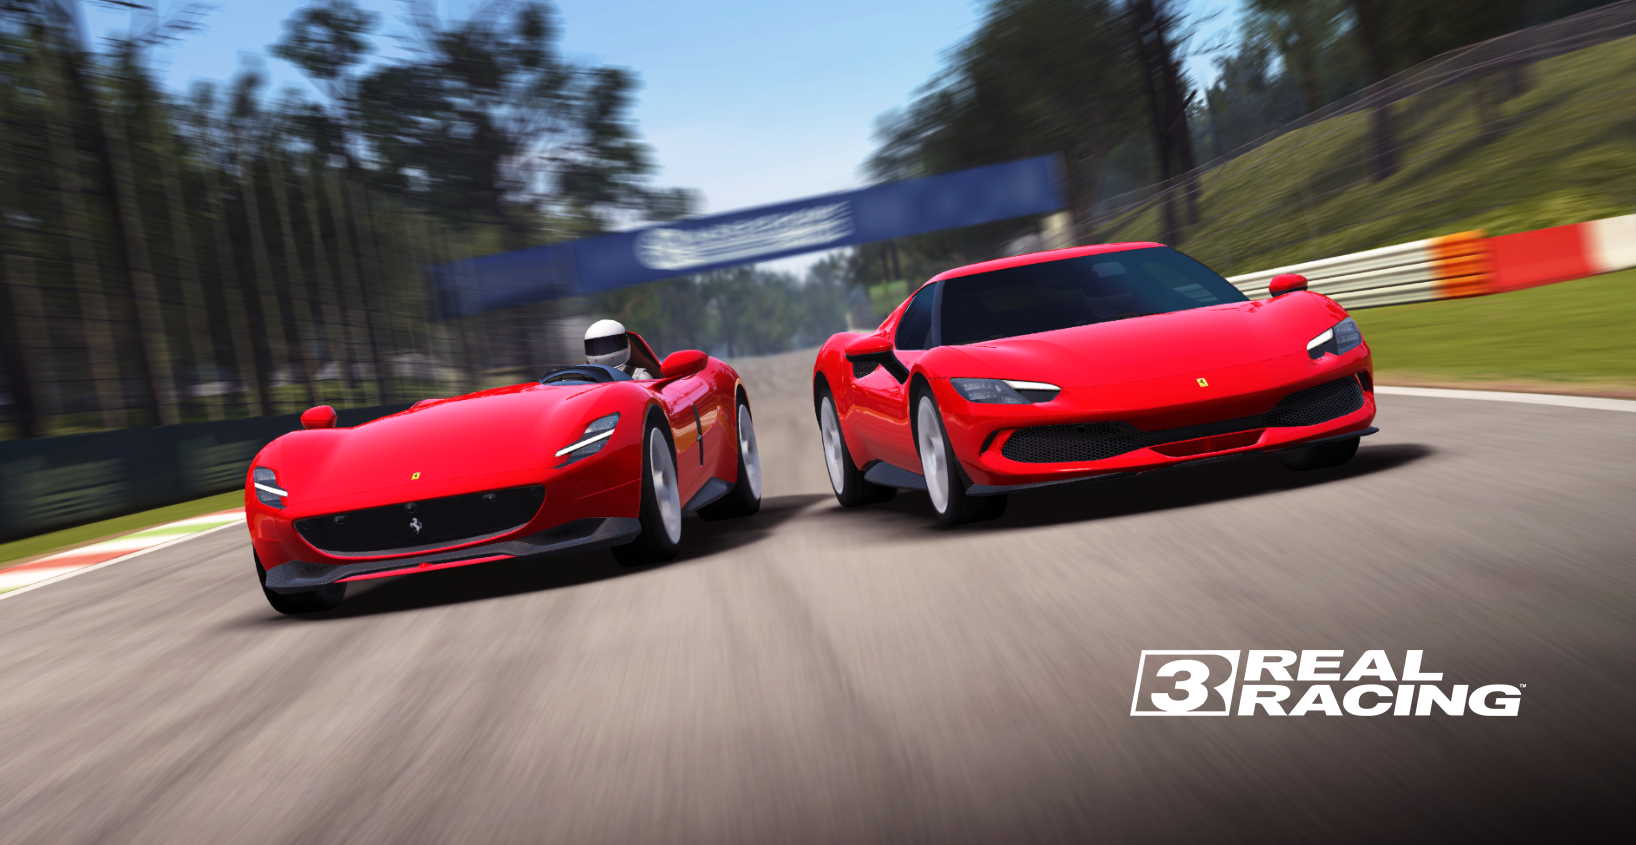